<a href="https://colab.research.google.com/github/foxyreign/Adhocs/blob/master/Time_Series_Analysis_of_Annual_Suicide_Rates_in_the_Philippines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis of Standardized Annual Suicide Rates in the Philippines**

**Annual Standardized Suicide Rates of the Philippines**

The dataset contains numerical values of standardized annual suicide rates per 100,000 in different countries from 2000 to 2019.

*Insert source here.*

In [ ]:
# Load libraries for Google Sheets authentication
import gspread
import pandas as pd
import numpy as np
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Annual Standardized Suicide Rates dataset from WHO
spreadsheet = gc.open_by_key('1cNld1SFTW_7B1jKCZWGubN47pFmX-_IKIi1-i2Jl8BE')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())

# Code for making the first row as header.
df.columns = df.iloc[0]
df = df.drop(0)

# Preview dataset
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
1,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,,,0,,0,0.0 [0.0-0.0],,,EN,2021-02-08T16:00:00.000Z
2,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,,,0.11,,0.22,0.2 [0.1-0.2],,,EN,2021-02-08T16:00:00.000Z
3,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,,,0.22,,0.42,0.3 [0.2-0.4],,,EN,2021-02-08T16:00:00.000Z
4,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,,,0.22,,0.45,0.3 [0.2-0.5],,,EN,2021-02-08T16:00:00.000Z
5,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,,,0.34,,0.65,0.5 [0.3-0.7],,,EN,2021-02-08T16:00:00.000Z


In [ ]:
# Check which columns are necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 1 to 10980
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IndicatorCode               10980 non-null  object
 1   Indicator                   10980 non-null  object
 2   ValueType                   10980 non-null  object
 3   ParentLocationCode          10980 non-null  object
 4   ParentLocation              10980 non-null  object
 5   Location type               10980 non-null  object
 6   SpatialDimValueCode         10980 non-null  object
 7   Location                    10980 non-null  object
 8   Period type                 10980 non-null  object
 9   Period                      10980 non-null  object
 10  IsLatestYear                10980 non-null  object
 11  Dim1 type                   10980 non-null  object
 12  Dim1                        10980 non-null  object
 13  Dim1ValueCode               10980 non-null  ob

Necessary columns to retain to do time-series analysis

*   6 - SpatialDimValueCode == PHL
*   9 - Period
*   12 - Dim1 == Both sexes, Male, Female
*   23 - FactValueNumeric
*   26 - FactValueNumericLow
*   28 - FactValueNumericHigh

In [ ]:
# Drop unnecessary columns
df = df[['SpatialDimValueCode','Period','Dim1',
         'FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']]
df.head()

,SpatialDimValueCode,Period,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
1,ATG,2019,Male,0,0,0
2,BRB,2019,Female,0.16,0.11,0.22
3,BRB,2019,Both sexes,0.31,0.22,0.42
4,ATG,2019,Both sexes,0.32,0.22,0.45
5,BRB,2019,Male,0.49,0.34,0.65


In [ ]:
# Change columns to their appropriate data types
df['Period'] = pd.to_datetime(df['Period'], format='%Y')
df['FactValueNumeric'] = pd.to_numeric(df['FactValueNumeric'])
df['FactValueNumericLow'] = pd.to_numeric(df['FactValueNumericLow'])
df['FactValueNumericHigh'] = pd.to_numeric(df['FactValueNumericHigh'])

# Rename Dim1 to Sex and drop Dim1 column
df['Sex'] = df['Dim1']
df = df.drop('Dim1', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 1 to 10980
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   SpatialDimValueCode   10980 non-null  object        
 1   Period                10980 non-null  datetime64[ns]
 2   FactValueNumeric      10980 non-null  float64       
 3   FactValueNumericLow   10980 non-null  float64       
 4   FactValueNumericHigh  10980 non-null  float64       
 5   Sex                   10980 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 514.8+ KB


In [ ]:
# Filter Philippines rows only
phl_suicide_df = df.loc[df['SpatialDimValueCode'] == 'PHL']
phl_suicide_both_df = phl_suicide_df.loc[phl_suicide_df['Sex'] == 'Both sexes']
phl_suicide_male_df = phl_suicide_df.loc[phl_suicide_df['Sex'] == 'Male']
phl_suicide_female_df = phl_suicide_df.loc[phl_suicide_df['Sex'] == 'Female']

# Preview dataset of annual suicide rate for both sexes in the Philippines.
phl_suicide_both_df.head()

,SpatialDimValueCode,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Sex
210,PHL,2019-01-01,2.54,1.81,9.34,Both sexes
767,PHL,2018-01-01,2.58,1.84,9.33,Both sexes
1311,PHL,2017-01-01,2.63,1.95,9.27,Both sexes
1862,PHL,2016-01-01,2.67,2.00,9.27,Both sexes
2416,PHL,2015-01-01,2.71,2.07,9.17,Both sexes


In [ ]:
# There are no missing values in the dataset
phl_suicide_both_df.isnull().sum()

0
SpatialDimValueCode     0
Period                  0
FactValueNumeric        0
FactValueNumericLow     0
FactValueNumericHigh    0
Sex                     0
dtype: int64

**Summary Statistics and Descriptive Plots of Standardized Annual Suicide Rate of the Philippines for Both Sexes from 2000 to 2019.**

In [ ]:
phl_suicide_both_df.describe().round(2) # Ignore Period column as this is treated as year

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,20,20.00,20.00,20.00
mean,2009-07-02 06:00:00,2.53,1.99,6.80
min,2000-01-01 00:00:00,1.87,1.52,2.33
25%,2004-10-01 12:00:00,2.27,1.83,4.52
50%,2009-07-02 12:00:00,2.56,1.94,7.66
75%,2014-04-02 06:00:00,2.73,2.11,9.23
max,2019-01-01 00:00:00,3.37,2.69,9.51
std,NaN,0.34,0.26,2.65


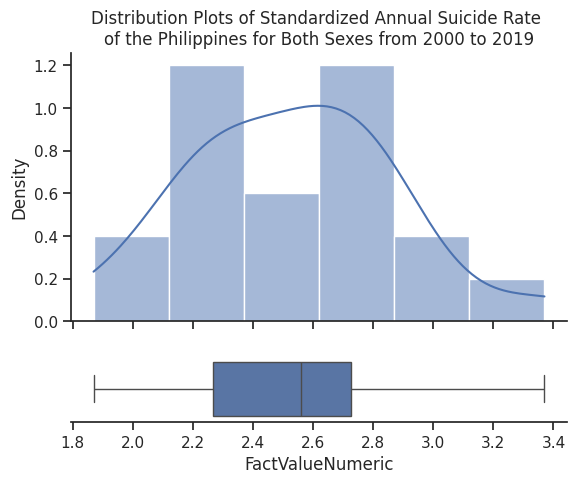

In [ ]:
# Load graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set graphics options
sns.set(style="ticks")

# Set graphics
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.80, .20)})

# Distribution plots
sns.histplot(x=phl_suicide_both_df['FactValueNumeric'], kde=True, stat='density', ax=ax_hist).set_title('Distribution Plots of Standardized Annual Suicide Rate \nof the Philippines for Both Sexes from 2000 to 2019')
sns.boxplot(x=phl_suicide_both_df['FactValueNumeric'], ax=ax_box)

# Set options
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Summary Statistics and Descriptive Plots of Standardized Female Annual Suicide Rate of the Philippines from 2000 to 2019.**

In [ ]:
phl_suicide_female_df.describe().round(2) # Ignore Period column as this is treated as year

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,20,20.00,20.00,20.00
mean,2009-07-02 06:00:00,1.26,1.08,5.71
min,2000-01-01 00:00:00,0.90,0.79,1.03
25%,2004-10-01 12:00:00,1.11,0.97,2.53
50%,2009-07-02 12:00:00,1.23,1.02,5.78
75%,2014-04-02 06:00:00,1.36,1.11,9.29
max,2019-01-01 00:00:00,1.77,1.55,9.65
std,NaN,0.21,0.18,3.36


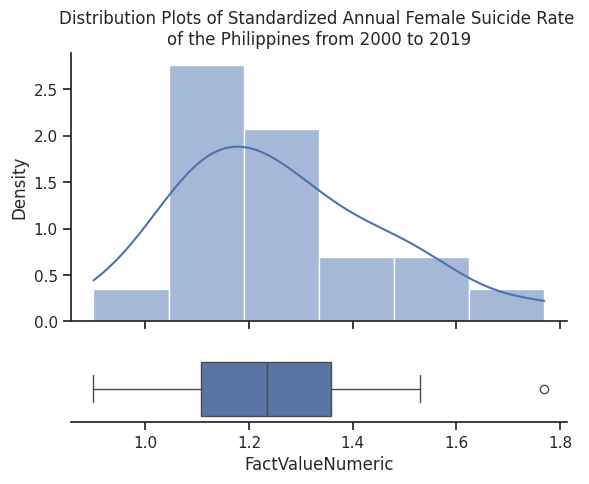

In [ ]:
# Set graphics options
sns.set(style="ticks")

# Set graphics
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.80, .20)})

# Distribution plots
sns.histplot(x=phl_suicide_female_df['FactValueNumeric'], kde=True, stat='density', ax=ax_hist).set_title('Distribution Plots of Standardized Annual Female Suicide Rate \nof the Philippines from 2000 to 2019')
sns.boxplot(x=phl_suicide_female_df['FactValueNumeric'], ax=ax_box)

# Set options
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Summary Statistics and Descriptive Plots of Standardized Male Annual Suicide Rate of the Philippines from 2000 to 2019.**

In [ ]:
phl_suicide_male_df.describe().round(2) # Ignore Period column as this is treated as year

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,20,20.00,20.00,20.00
mean,2009-07-02 06:00:00,3.90,2.98,8.10
min,2000-01-01 00:00:00,2.92,2.32,3.76
25%,2004-10-01 12:00:00,3.48,2.72,6.87
50%,2009-07-02 12:00:00,3.94,2.94,9.34
75%,2014-04-02 06:00:00,4.27,3.20,9.41
max,2019-01-01 00:00:00,5.09,3.92,11.20
std,NaN,0.51,0.36,2.22


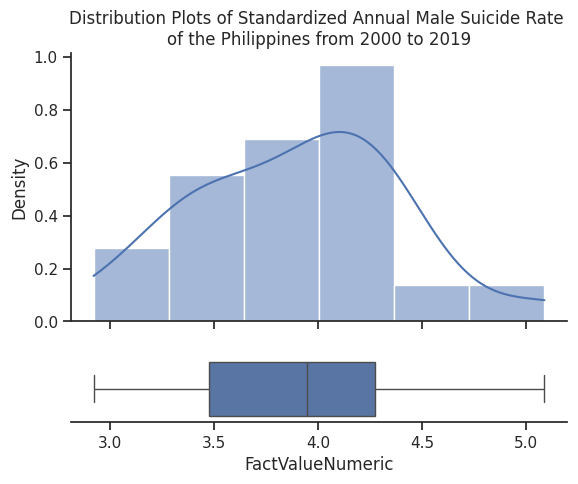

In [ ]:
# Set graphics options
sns.set(style="ticks")

# Set graphics
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.80, .20)})

# Distribution plots
sns.histplot(x=phl_suicide_male_df['FactValueNumeric'], kde=True, stat='density', ax=ax_hist).set_title('Distribution Plots of Standardized Annual Male Suicide Rate \nof the Philippines from 2000 to 2019')
sns.boxplot(x=phl_suicide_male_df['FactValueNumeric'], ax=ax_box)

# Set options
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**Comparison of Distribution of Standardized Annual Suicide Rates per 100,000 population in the Philippines per Sexes**

Males have a higher suicide rate of **3.9**, compared to females of **1.26**. The overall average suicide rate per 100,000 population is **2.5**.

The annual male suicide is significantly higher compared to annual female suicide *(t = 21.58, df = 38, p-value < 0.01).*



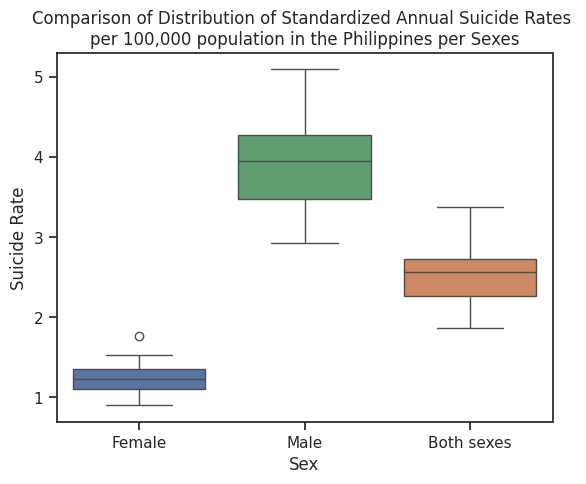

In [ ]:
# Manually set sex order for display
sex_order = ['Female', 'Male', 'Both sexes']

# Box plot
box_compare = sns.boxplot(x='Sex', y='FactValueNumeric', hue='Sex', order=sex_order, data=phl_suicide_df)
box_compare.set(ylabel='Suicide Rate', title='Comparison of Distribution of Standardized Annual Suicide Rates \nper 100,000 population in the Philippines per Sexes')
plt.show()

In [ ]:
# Install and necessary libraries for statical tests
import pingouin as pg

# T-test comparing Female vs Male annual suicide rates
pg.ttest(phl_suicide_male_df['FactValueNumeric'], phl_suicide_female_df['FactValueNumeric'], alternative='greater', paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,21.572281,38,greater,3.194937e-23,"[2.43, inf]",6.821754,5.957e+19,1.0


**Time-series plots**

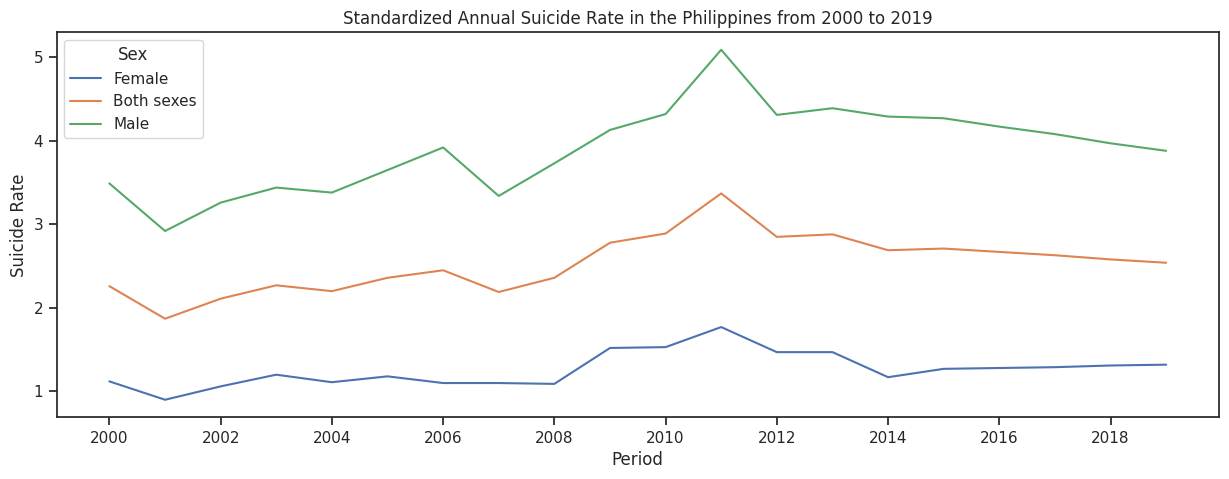

In [ ]:
# Set plot options
plt.figure(figsize=(15,5))
plt.ylabel('Suicide Rate')
plt.title('Standardized Annual Suicide Rate in the Philippines from 2000 to 2019')
sns.set(style='ticks')

# Plot time-series
time_series_plt = sns.lineplot(data=phl_suicide_df, x='Period', y='FactValueNumeric', hue='Sex')

**Time-series decomposition**

Since the dataset is aggregated annually, consisting of only 20 periods (years), there's no significant trend or seasonlity observed in both sexes, female nor male suicide rates over time. Also, the ADF tests support that the suicide rates are non-stationary or it varies over the years. Due to this phenomenon, forecasting is not applicable on these datasets as there are no patterns observed in the residuals after decomposition. Although, just looking at the stationary of the dependent variable does not mean we cannot use this for regression analysis or ANOVA.

With those tests mentioned, we **cannot** assume independence of each sampling unit as they're dependent on time but due to the low correlation coefficient and limited data points to consider for a proper time-series analysis due to annual aggregation, we will be considering each annual aggregation as the sampling unit to be IID - independent and identically distributed so we can proceed doing parametric inferences.

Once your TEMPOS data has been aggregated and finalized, we can run linear regression (or ANOVA) to check if the residuals of the model will result to **spurious relationship**. If it doesn't, then we can use the model for your thesis, otherwise, we have to use other transformation so we can produce a result that will not lead to spurious correlation/regression.

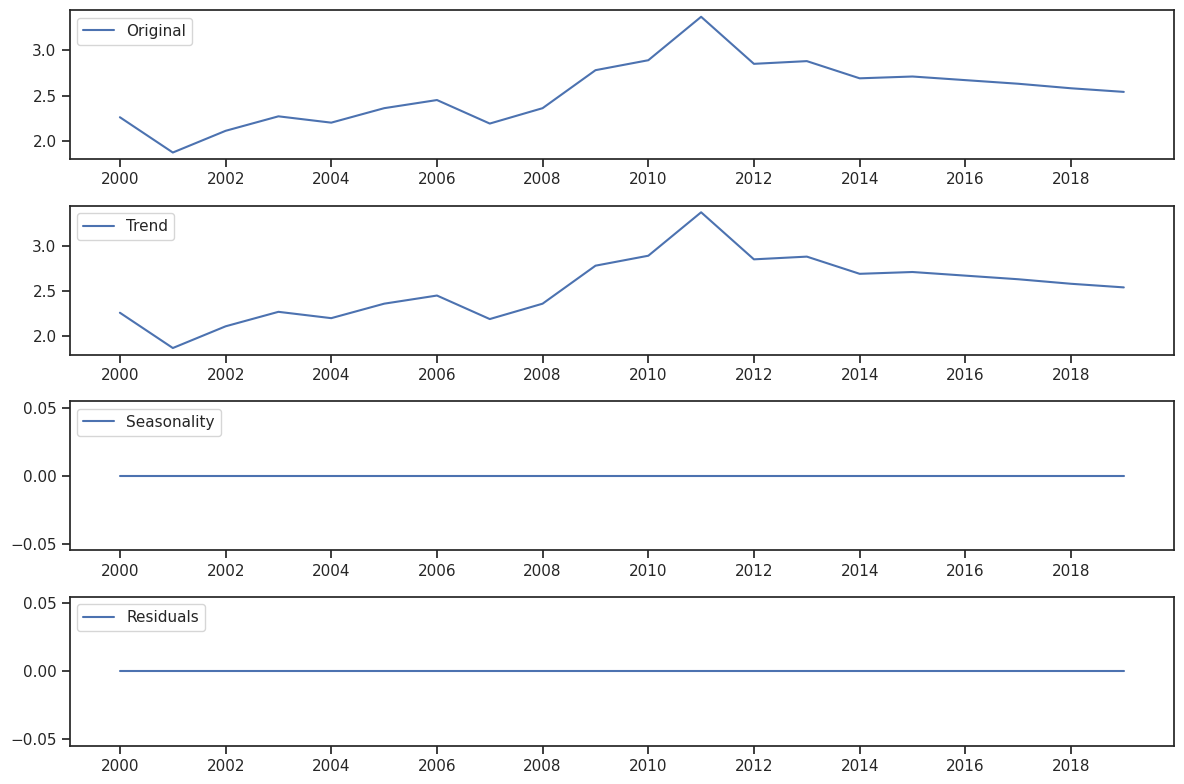


ADF Statistic: -1.4426229778961657
p-value: 0.5616802849486324
Critical Values: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Prepare dataset for both sexes
time_both_df = pd.DataFrame(data=phl_suicide_both_df[['Period','FactValueNumeric']])
time_both_df.set_index('Period', inplace=True)

# Perform time series decomposition
decomposition_both = seasonal_decompose(time_both_df, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(time_both_df, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition_both.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition_both.seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition_both.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ADF Test for stationary
result = adfuller(phl_suicide_both_df['FactValueNumeric'])
print('')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

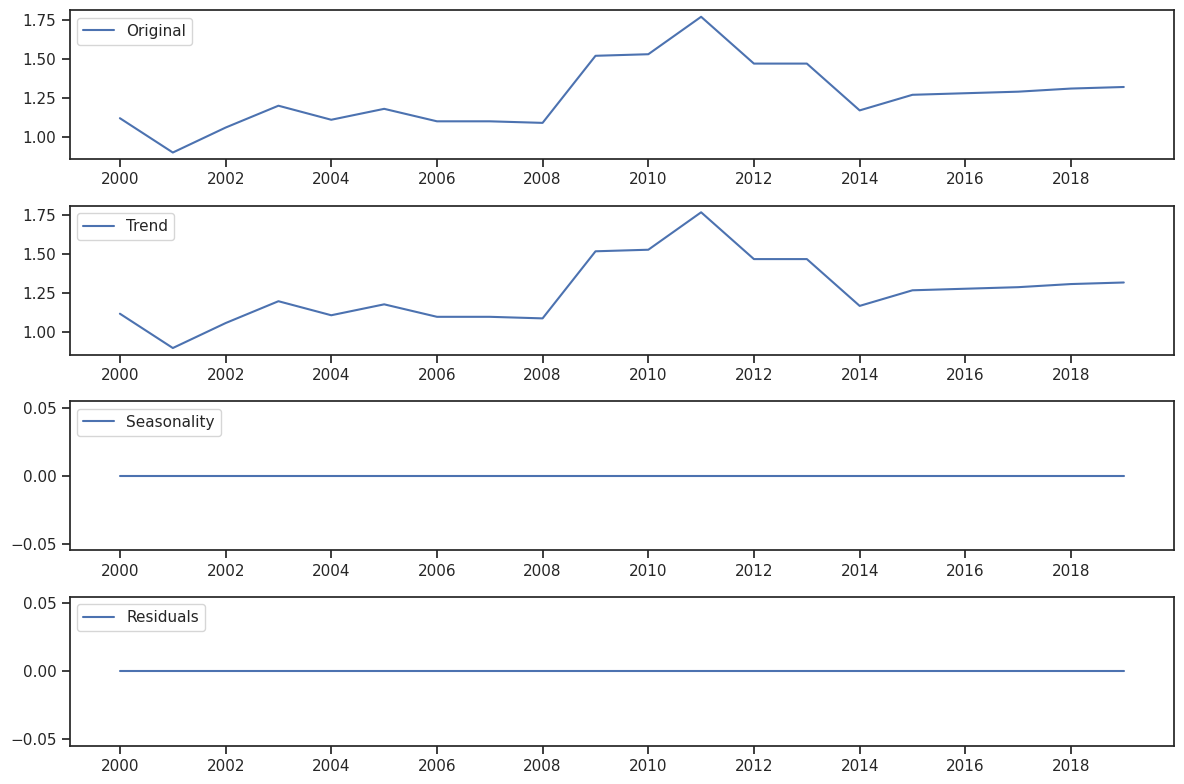


ADF Statistic: -1.7931576041967368
p-value: 0.3838640057532423
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


In [ ]:
# Prepare dataset for females
time_female_df = pd.DataFrame(data=phl_suicide_female_df[['Period','FactValueNumeric']])
time_female_df.set_index('Period', inplace=True)

# Perform time series decomposition
decomposition_female = seasonal_decompose(time_female_df, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(time_female_df, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition_female.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition_female.seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition_female.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ADF Test for stationary
result = adfuller(phl_suicide_female_df['FactValueNumeric'])
print('')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

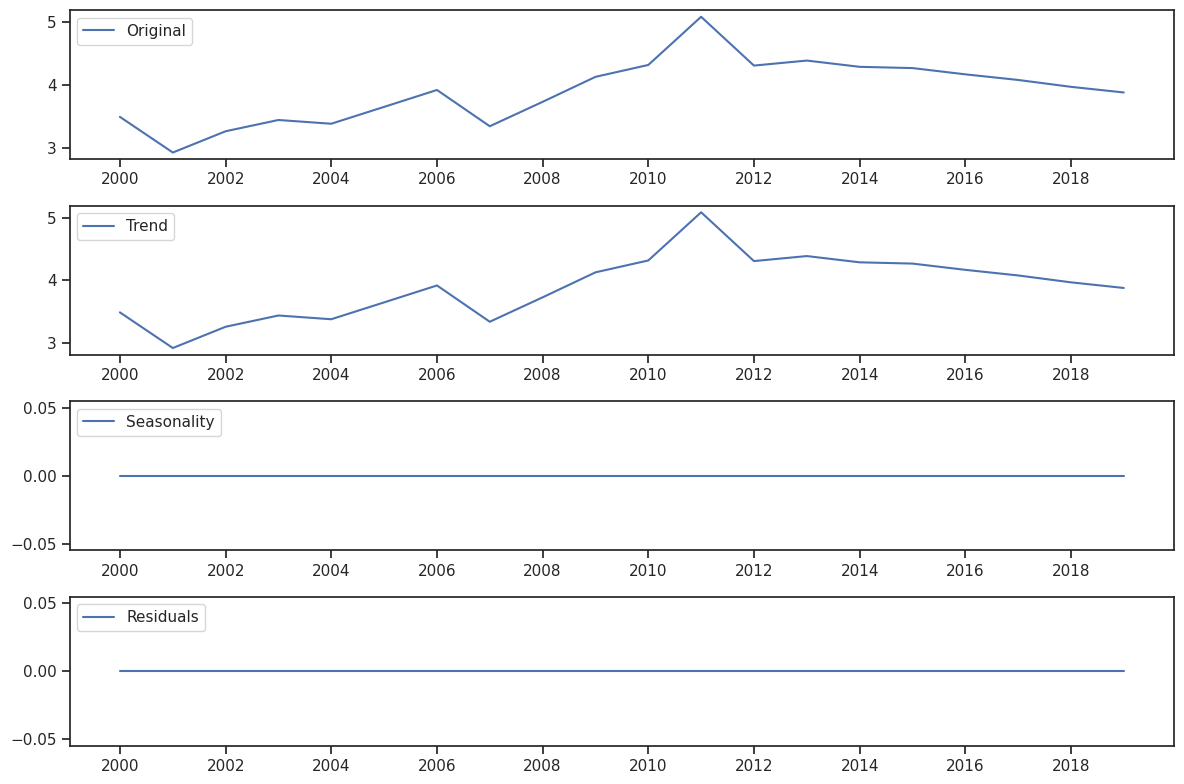


ADF Statistic: -1.5056173131889037
p-value: 0.5307307267732259
Critical Values: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}


In [ ]:
# Prepare dataset for males
time_male_df = pd.DataFrame(data=phl_suicide_male_df[['Period','FactValueNumeric']])
time_male_df.set_index('Period', inplace=True)

# Perform time series decomposition
decomposition_male = seasonal_decompose(time_male_df, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(time_male_df, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition_male.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition_male.seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition_male.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ADF Test for stationary
result = adfuller(phl_suicide_male_df['FactValueNumeric'])
print('')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

**Autocorrelation**

Almost all of the lags are statistically significant in relation to the autocorrelation / partial autocorrelation tests (except for Lag 0 and Lag 1 in both sexes, female and male datasets), the correlation coefficient of these tests are either very weak or only moderately correlated. What is observed in the plots below is white noise.

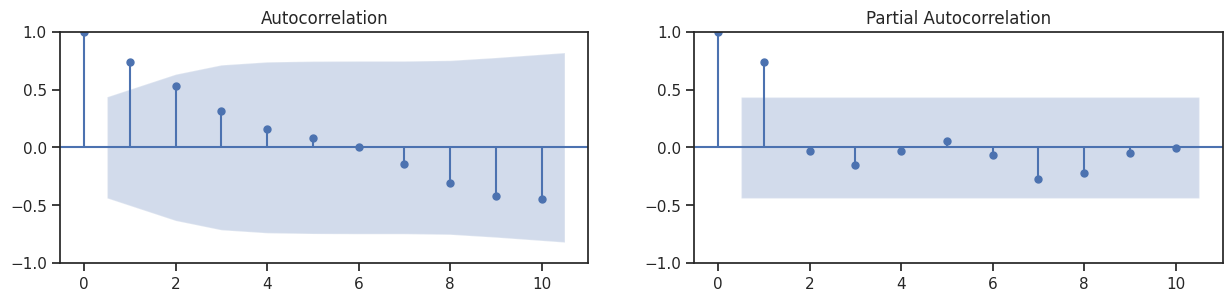


Autocorrelation of Suicide Rates for Both Sexes
[ 1.          0.73844894  0.53171593  0.31312305  0.15522713  0.07782121
  0.00588157 -0.14501735 -0.31240827 -0.42089031 -0.44887791 -0.32601051
 -0.2210771  -0.1556189 ]

Partial Autocorrelation of Suicide Rates for Both Sexes
[ 1.          0.77731468 -0.03391421 -0.20253245 -0.04798228  0.09427565
 -0.10356766 -0.51394052 -0.59817834 -0.49698448]


In [ ]:
import statsmodels.api as sm

# Set figure options
fig, ax = plt.subplots(1,2,figsize=(15,3))

# Both Sexes
sm.graphics.tsa.plot_acf(phl_suicide_both_df['FactValueNumeric'], ax=ax[0])
sm.graphics.tsa.plot_pacf(phl_suicide_both_df['FactValueNumeric'], ax=ax[1])
plt.show()

# Display ACF and PACF coefficients
print('')
print('Autocorrelation of Suicide Rates for Both Sexes')
print(sm.tsa.acf(time_both_df))
print('')
print('Partial Autocorrelation of Suicide Rates for Both Sexes')
print(sm.tsa.pacf(time_both_df))

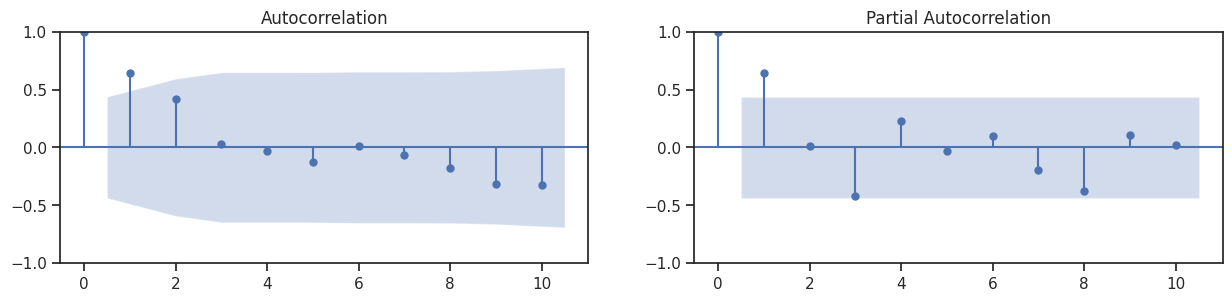


Autocorrelation of Female Suicide Rates
[ 1.          0.64634997  0.42236173  0.02842733 -0.03029205 -0.12660356
  0.01071437 -0.06230987 -0.17875735 -0.31620928 -0.32789509 -0.25831741
 -0.1341133  -0.01942508]

Partial Autocorrelation of Female Suicide Rates
[ 1.          0.68036839  0.01189663 -0.54027928  0.3444666  -0.04589975
  0.144663   -0.41823304 -0.90421465  1.03009549]


In [ ]:
# Set figure options
fig, ax = plt.subplots(1,2,figsize=(15,3))

# Female
sm.graphics.tsa.plot_acf(phl_suicide_female_df['FactValueNumeric'], ax=ax[0])
sm.graphics.tsa.plot_pacf(phl_suicide_female_df['FactValueNumeric'], ax=ax[1])
plt.show()

# Display ACF and PACF coefficients
print('')
print('Autocorrelation of Female Suicide Rates')
print(sm.tsa.acf(time_female_df))
print('')
print('Partial Autocorrelation of Female Suicide Rates')
print(sm.tsa.pacf(time_female_df))

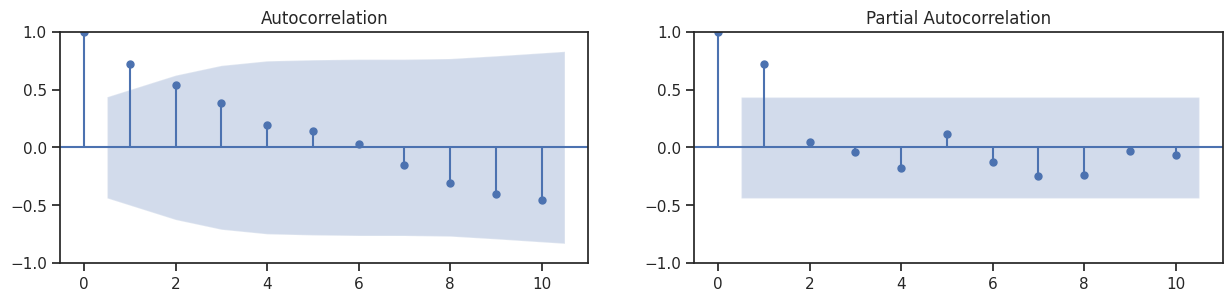


Autocorrelation of Male Suicide Rates
[ 1.          0.71989262  0.54161249  0.38657135  0.19242209  0.13717587
  0.02536386 -0.14891312 -0.30918829 -0.40504919 -0.45779472 -0.34309656
 -0.25384496 -0.21590976]

Partial Autocorrelation of Male Suicide Rates
[ 1.          0.75778171  0.06472683 -0.04898434 -0.25052564  0.17672389
 -0.21306771 -0.47101736 -0.64040184 -0.53796611]


In [ ]:
# Set figure options
fig, ax = plt.subplots(1,2,figsize=(15,3))

# Male
sm.graphics.tsa.plot_acf(phl_suicide_male_df['FactValueNumeric'], ax=ax[0])
sm.graphics.tsa.plot_pacf(phl_suicide_male_df['FactValueNumeric'], ax=ax[1])
plt.show()

# Display ACF and PACF coefficients
print('')
print('Autocorrelation of Male Suicide Rates')
print(sm.tsa.acf(time_male_df))
print('')
print('Partial Autocorrelation of Male Suicide Rates')
print(sm.tsa.pacf(time_male_df))